In [7]:
network = "OO"
station = "HYSB1"
channel = "*"
location = ""
client = Client("IRIS")
st = client.get_waveforms(network=network, station=station, location=location,
                                  channel=channel, starttime=current_date,
                                  endtime=current_date + 86400)

In [8]:
st

14 Trace(s) in Stream:
OO.HYSB1..HDH | 2015-03-02T00:00:00.000000Z - 2015-03-02T17:34:37.024828Z | 200.0 Hz, 12655405 samples
OO.HYSB1..HHE | 2015-03-02T00:00:00.000000Z - 2015-03-02T17:34:36.615000Z | 200.0 Hz, 12655324 samples
OO.HYSB1..HHN | 2015-03-02T00:00:00.000000Z - 2015-03-02T17:34:35.885345Z | 200.0 Hz, 12655180 samples
OO.HYSB1..HHZ | 2015-03-02T00:00:00.000000Z - 2015-03-02T17:34:35.850172Z | 200.0 Hz, 12655172 samples
OO.HYSB1..HNE | 2015-03-02T00:00:00.000000Z - 2015-03-02T17:34:33.949827Z | 200.0 Hz, 12654790 samples
OO.HYSB1..HNN | 2015-03-02T00:00:00.000000Z - 2015-03-02T17:34:33.490173Z | 200.0 Hz, 12654700 samples
OO.HYSB1..HNZ | 2015-03-02T00:00:00.000000Z - 2015-03-02T17:34:33.445000Z | 200.0 Hz, 12654690 samples
OO.HYSB1..LDH | 2015-03-02T00:00:00.000000Z - 2015-03-03T00:00:00.000000Z | 1.0 Hz, 86401 samples
OO.HYSB1..LHE | 2015-03-02T00:00:00.000000Z - 2015-03-03T00:00:00.000000Z | 1.0 Hz, 86401 samples
OO.HYSB1..LHN | 2015-03-02T00:00:00.000000Z - 2015-03-03T00:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from obspy import UTCDateTime
from obspy.clients.fdsn import Client

network = "OO"
station = "HYSB1"
location = ""
channel = "HHZ"
client = Client("IRIS")

# Define a function to calculate peak ground velocity
def calculate_pgv(stream, inventory):
    # Detrend and taper the data
    stream.detrend(type='linear')
    stream.taper(max_percentage=0.05, type='cosine')
    
    # Remove the instrumental response to get velocity
    pre_filt = (0.005, 0.006, 30.0, 35.0)
    stream.remove_response(inventory=inventory, output='VEL', pre_filt=pre_filt, zero_mean=True, taper=True)
    
    # Calculate PGV (maximum absolute amplitude)
    pgv = np.max(np.abs(stream[0].data))
    
    return pgv

# Initialize an empty list to store results
pgv_results = []

# Define the start and end date for the data request
start_date = UTCDateTime("2014-10-01")
end_date = UTCDateTime("2020-12-31")

# Fetch the inventory once
inventory = client.get_stations(network=network, station=station, location=location,
                                channel=channel, level="response", starttime=start_date, endtime=end_date)

# Loop over each day in the specified date range
current_date = start_date
while current_date <= end_date:
    try:
        # Fetch the data for the current day
        st = client.get_waveforms(network=network, station=station, location=location,
                                  channel=channel, starttime=current_date,
                                  endtime=current_date + 86400)
        # Calculate PGV for the current day
        pgv = calculate_pgv(st, inventory)
        
        # Append the result to the list
        pgv_results.append((current_date.date, pgv))
        
        print(f"PGV for {current_date.date}: {pgv:.4f}")
        
    except Exception as e:
        print(f"Failed to process data for {current_date.date}: {e}")
    
    # Move to the next day
    current_date += 86400

# Save results to a CSV file
output_file = "pgv_results.csv"
with open(output_file, 'w') as f:
    f.write("Date,PGV\n")
    for date, pgv in pgv_results:
        f.write(f"{date},{pgv:.4f}\n")

print(f"Results saved to {output_file}")


Failed to process data for 2014-10-01: No data available for request.
HTTP Status code: 204
Detailed response of server:


Failed to process data for 2014-10-02: No data available for request.
HTTP Status code: 204
Detailed response of server:


Failed to process data for 2014-10-03: No data available for request.
HTTP Status code: 204
Detailed response of server:


Failed to process data for 2014-10-04: No data available for request.
HTTP Status code: 204
Detailed response of server:


Failed to process data for 2014-10-05: No data available for request.
HTTP Status code: 204
Detailed response of server:


Failed to process data for 2014-10-06: No data available for request.
HTTP Status code: 204
Detailed response of server:


Failed to process data for 2014-10-07: No data available for request.
HTTP Status code: 204
Detailed response of server:


Failed to process data for 2014-10-08: No data available for request.
HTTP Status code: 204
Detailed response of server:


Failed to proces

KeyboardInterrupt: 

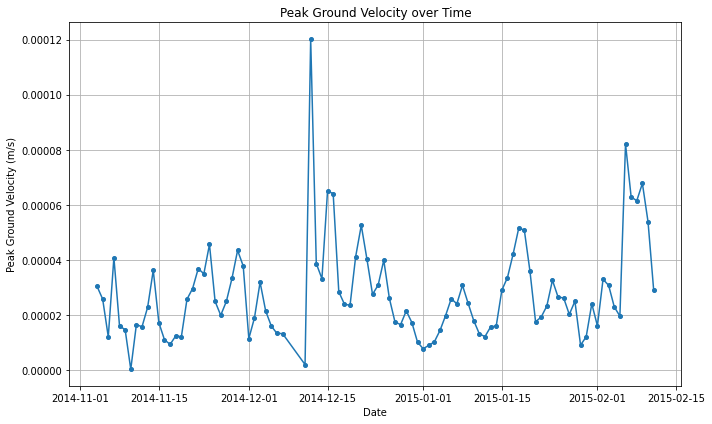

In [2]:
# Plot PGV as a function of time
dates, pgvs = zip(*pgv_results)
plt.figure(figsize=(10, 6))
plt.plot(dates, pgvs, marker='o', linestyle='-', markersize=4)
plt.xlabel('Date')
plt.ylabel('Peak Ground Velocity (m/s)')
plt.title('Peak Ground Velocity over Time')
plt.grid(True)
plt.tight_layout()
plt.savefig('pgv_plot.png')
plt.show()

In [3]:
pgvs

(3.037009138225411e-05,
 2.5747115271083544e-05,
 1.2031033595862961e-05,
 4.0792337229891715e-05,
 1.5990651103031677e-05,
 1.459804897721903e-05,
 2.2847724533706567e-07,
 1.6479727201152813e-05,
 1.5669828778860734e-05,
 2.2759505042922048e-05,
 3.61934008921397e-05,
 1.713445039945617e-05,
 1.094039120039351e-05,
 9.275484699913927e-06,
 1.236477141785751e-05,
 1.2044114712952308e-05,
 2.5687444764916618e-05,
 2.956997730980612e-05,
 3.6796983868358174e-05,
 3.493260675784618e-05,
 4.557990290861522e-05,
 2.489118340736818e-05,
 1.9850693286682777e-05,
 2.487567970817196e-05,
 3.323697998680191e-05,
 4.342389330632814e-05,
 3.777931753590522e-05,
 1.1395514284878074e-05,
 1.889269028395562e-05,
 3.186343012534186e-05,
 2.1372914671131236e-05,
 1.5933885174490758e-05,
 1.3252825774998787e-05,
 1.3207214366083679e-05,
 1.9369728592068033e-06,
 0.00012025810788849111,
 3.862164795620668e-05,
 3.31617589689891e-05,
 6.501345884988433e-05,
 6.405808303272813e-05,
 2.8402602697695977e-05

In [ ]:
import obspy
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
import numpy as np
import os

# Define parameters
network = "OO"
station = "HYSB1"
location = ""
channel = "HHZ"
client = Client("IRIS")

# Define a function to calculate peak ground velocity
def calculate_pgv(stream):
    # Detrend and taper the data
    stream.detrend(type='linear')
    stream.taper(max_percentage=0.05, type='cosine')
    
    # Integrate to get velocity
    stream.integrate()
    
    # Calculate PGV (maximum absolute amplitude)
    pgv = np.max(np.abs(stream[0].data))
    
    return pgv

# Initialize an empty list to store results
pgv_results = []

# Define the start and end date for the data request
start_date = UTCDateTime("2014-10-01")
end_date = UTCDateTime("2020-12-31")

# Loop over each day in the specified date range
current_date = start_date
while current_date <= end_date:
    try:
        # Fetch the data for the current day
        st = client.get_waveforms(network=network, station=station, location=location,
                                  channel=channel, starttime=current_date,
                                  endtime=current_date + 86400)
        # Calculate PGV for the current day
        pgv = calculate_pgv(st)
        
        # Append the result to the list
        pgv_results.append((current_date.date, pgv))
        
        print(f"PGV for {current_date.date}: {pgv:.4f}")
        
    except Exception as e:
        print(f"Failed to process data for {current_date.date}: {e}")
    
    # Move to the next day
    current_date += 86400

# Save results to a CSV file
output_file = "pgv_results.csv"
with open(output_file, 'w') as f:
    f.write("Date,PGV\n")
    for date, pgv in pgv_results:
        f.write(f"{date},{pgv:.4f}\n")

print(f"Results saved to {output_file}")


# Plotting the results
dates, pgvs = zip(*pgv_results)

plt.figure(figsize=(10, 6))
plt.plot(dates, pgvs, marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Peak Ground Velocity (m/s)')
plt.title('Daily Peak Ground Velocity for Station HYSB1, Network OO')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("pgv_plot.png")
plt.show()

Failed to process data for 2014-10-01: No data available for request.
HTTP Status code: 204
Detailed response of server:


Failed to process data for 2014-10-02: No data available for request.
HTTP Status code: 204
Detailed response of server:


Failed to process data for 2014-10-03: No data available for request.
HTTP Status code: 204
Detailed response of server:


Failed to process data for 2014-10-04: No data available for request.
HTTP Status code: 204
Detailed response of server:


Failed to process data for 2014-10-05: No data available for request.
HTTP Status code: 204
Detailed response of server:


Failed to process data for 2014-10-06: No data available for request.
HTTP Status code: 204
Detailed response of server:


Failed to process data for 2014-10-07: No data available for request.
HTTP Status code: 204
Detailed response of server:


Failed to process data for 2014-10-08: No data available for request.
HTTP Status code: 204
Detailed response of server:


Failed to proces

PGV for 2015-03-02: 3022583.4993
PGV for 2015-03-03: 5804.5392
PGV for 2015-03-04: 44042.0416
PGV for 2015-03-05: 2298082.4129
PGV for 2015-03-06: 358970.2156
Failed to process data for 2015-03-07: No data available for request.
HTTP Status code: 204
Detailed response of server:


PGV for 2015-03-08: 1960490.5737
PGV for 2015-03-09: 455055.5261
PGV for 2015-03-10: 2591138.1849
PGV for 2015-03-11: 1816545.9185
PGV for 2015-03-12: 1818387.7982
PGV for 2015-03-13: 1891328.1953
PGV for 2015-03-14: 1722455.9655
PGV for 2015-03-15: 2074386.5169
PGV for 2015-03-16: 2815242.3703
PGV for 2015-03-17: 3525404.2067
PGV for 2015-03-18: 3639952.0027
PGV for 2015-03-19: 849363.5408
PGV for 2015-03-20: 4666213.4998
PGV for 2015-03-21: 3836896.3811
PGV for 2015-03-22: 3522462.3409
PGV for 2015-03-23: 2642790.9558
PGV for 2015-03-24: 1403507.7778
PGV for 2015-03-25: 1162100.3473
PGV for 2015-03-26: 1845867.0106
PGV for 2015-03-27: 1789752.2058
PGV for 2015-03-28: 1763894.3889
PGV for 2015-03-29: 2022721

PGV for 2015-10-27: 4373443.9269
PGV for 2015-10-28: 4716261.1272
PGV for 2015-10-29: 4828923.3068
PGV for 2015-10-30: 4533361.0074
PGV for 2015-10-31: 3795379.2954
PGV for 2015-11-01: 1079544.4128
PGV for 2015-11-02: 2549441.4794
PGV for 2015-11-03: 1892888.6970
PGV for 2015-11-04: 1304931.3475
PGV for 2015-11-05: 1623349.1933
PGV for 2015-11-06: 2145540.3680
PGV for 2015-11-07: 2406162.3965
PGV for 2015-11-08: 2778481.5611
PGV for 2015-11-09: 2779895.4828
PGV for 2015-11-10: 3195058.5743
PGV for 2015-11-11: 3491716.1492
PGV for 2015-11-12: 3772010.5761
PGV for 2015-11-13: 4123630.1413
PGV for 2015-11-14: 2654842.0849
PGV for 2015-11-15: 137122.2012
PGV for 2015-11-16: 3632269.7298
PGV for 2015-11-17: 3089468.1364
PGV for 2015-11-18: 661576.1869
PGV for 2015-11-19: 593720.7250
PGV for 2015-11-20: 74836.5372
PGV for 2015-11-21: 342081.1136
PGV for 2015-11-22: 3098207.2500
PGV for 2015-11-23: 38343.1369
PGV for 2015-11-24: 3996056.4753
PGV for 2015-11-25: 1404192.4563
PGV for 2015-11-26

PGV for 2016-07-05: 2467371.0379
PGV for 2016-07-06: 27032.4577
PGV for 2016-07-07: 2144492.4677
PGV for 2016-07-08: 15727.1244
PGV for 2016-07-09: 770448.0679
PGV for 2016-07-10: 80898.6240
PGV for 2016-07-11: 402693.0806
PGV for 2016-07-12: 1695213.5058
PGV for 2016-07-13: 18206.7410
PGV for 2016-07-14: 1908874.6677
PGV for 2016-07-15: 17336.1041
Failed to process data for 2016-07-16: No data available for request.
HTTP Status code: 204
Detailed response of server:


Failed to process data for 2016-07-17: No data available for request.
HTTP Status code: 204
Detailed response of server:


PGV for 2016-07-18: 65182219.2825
PGV for 2016-07-19: 278101455.6726
PGV for 2016-07-20: 10744044.0782
PGV for 2016-07-21: 2136746.9404
PGV for 2016-07-22: 2530331.1011
PGV for 2016-07-23: 616488.3163
PGV for 2016-07-24: 51015.1268
PGV for 2016-07-25: 592874.0419
PGV for 2016-07-26: 1132725.6631
PGV for 2016-07-27: 380981.0157
PGV for 2016-07-28: 179712.2269
PGV for 2016-07-29: 3231533.3059
PGV for 2

PGV for 2017-03-03: 2261322.9385
PGV for 2017-03-04: 2362983.0504
PGV for 2017-03-05: 2182333.3195
PGV for 2017-03-06: 1607562.6466
PGV for 2017-03-07: 2324872.4277
PGV for 2017-03-08: 2781069.7679
PGV for 2017-03-09: 1796076.5639
PGV for 2017-03-10: 3247292.5437
PGV for 2017-03-11: 3365356.6985
PGV for 2017-03-12: 2479172.7529
PGV for 2017-03-13: 29628.4217
PGV for 2017-03-14: 3468455.0662
PGV for 2017-03-15: 2982082.9963
PGV for 2017-03-16: 1843347.8427
PGV for 2017-03-17: 1507639.1574
PGV for 2017-03-18: 936152.5646
PGV for 2017-03-19: 1115305.5483
PGV for 2017-03-20: 1376290.4055
PGV for 2017-03-21: 1400293.2994
PGV for 2017-03-22: 27623.4925
PGV for 2017-03-23: 351464.8216
PGV for 2017-03-24: 3075928.2056
PGV for 2017-03-25: 683154.4696
PGV for 2017-03-26: 3102347.9110
PGV for 2017-03-27: 25580.4952
PGV for 2017-03-28: 3122714.6369
PGV for 2017-03-29: 3631151.8391
PGV for 2017-03-30: 3202617.6977
PGV for 2017-03-31: 3176670.2422
PGV for 2017-04-01: 1996569.7320
PGV for 2017-04-02:

PGV for 2017-11-09: 2922183.3095
PGV for 2017-11-10: 1300590.3967
PGV for 2017-11-11: 1919585.6301
PGV for 2017-11-12: 1940274.0057
PGV for 2017-11-13: 2215923.1244
Failed to process data for 2017-11-14: No data available for request.
HTTP Status code: 204
Detailed response of server:


PGV for 2017-11-15: 65039755.8122
PGV for 2017-11-16: 3870839.3201
PGV for 2017-11-17: 3360957.4417
PGV for 2017-11-18: 3546276.9982
PGV for 2017-11-19: 4095389.4090
PGV for 2017-11-20: 2560755.3623
PGV for 2017-11-21: 3725185.4159
PGV for 2017-11-22: 3411386.5207
PGV for 2017-11-23: 3320430.7981
PGV for 2017-11-24: 2210274.1375
PGV for 2017-11-25: 1858995.4606
PGV for 2017-11-26: 1554984.8975
PGV for 2017-11-27: 1076068.9259
PGV for 2017-11-28: 1462750.8008
PGV for 2017-11-29: 2387311.9296
PGV for 2017-11-30: 2737624.8840
PGV for 2017-12-01: 3019600.7978
PGV for 2017-12-02: 4155304.1191
PGV for 2017-12-03: 4656207.5402
PGV for 2017-12-04: 5031639.9103
PGV for 2017-12-05: 5023706.4050
PGV for 2017-12-06

PGV for 2018-07-09: 3490955.3450
PGV for 2018-07-10: 4218059.1923
PGV for 2018-07-11: 1091201.9486
PGV for 2018-07-12: 4776450.8649
PGV for 2018-07-13: 5055393.5781
PGV for 2018-07-14: 4255870.1467
PGV for 2018-07-15: 2747318.5734
PGV for 2018-07-16: 2422454.9575
PGV for 2018-07-17: 2557001.7559
PGV for 2018-07-18: 415716.3461
PGV for 2018-07-19: 2352586.5913
PGV for 2018-07-20: 2260860.4030
PGV for 2018-07-21: 2379816.9634
PGV for 2018-07-22: 2678747.5093
PGV for 2018-07-23: 3237680.4025
PGV for 2018-07-24: 137394.7925
PGV for 2018-07-25: 519054.1557
PGV for 2018-07-26: 4113958.2412
PGV for 2018-07-27: 1892886.8992
PGV for 2018-07-28: 3760014.0449
PGV for 2018-07-29: 3520484.1820
PGV for 2018-07-30: 2711831.5035
PGV for 2018-07-31: 129792.7584
PGV for 2018-08-01: 55052.6565
PGV for 2018-08-02: 90744.0821
PGV for 2018-08-03: 1865515.0089
PGV for 2018-08-04: 2099634.8100
PGV for 2018-08-05: 2385633.5785
PGV for 2018-08-06: 2762222.4749
PGV for 2018-08-07: 3552212.6951
PGV for 2018-08-08

PGV for 2019-02-02: 1918221.4279
PGV for 2019-02-03: 3476123.8319
PGV for 2019-02-04: 3776511.1216
PGV for 2019-02-05: 2917241.0283
PGV for 2019-02-06: 2395825.0050
PGV for 2019-02-07: 3784280.7527
PGV for 2019-02-08: 3534230.2641
PGV for 2019-02-09: 2425566.9043
PGV for 2019-02-10: 2177391.0616
PGV for 2019-02-11: 462163.1449
PGV for 2019-02-12: 1145339.4426
PGV for 2019-02-13: 1146883.1997
PGV for 2019-02-14: 310461.3193
PGV for 2019-02-15: 2455530.6452
PGV for 2019-02-16: 3124038.2452
PGV for 2019-02-17: 3691181.4565
PGV for 2019-02-18: 4162351.1624
PGV for 2019-02-19: 5030396.0417
PGV for 2019-02-20: 4309633.0532
PGV for 2019-02-21: 5147530.8877
PGV for 2019-02-22: 714680.3261
PGV for 2019-02-23: 3537330.2425
PGV for 2019-02-24: 2209007.9172
PGV for 2019-02-25: 1362263.6836
PGV for 2019-02-26: 1825824.7894
PGV for 2019-02-27: 1830168.9183
PGV for 2019-02-28: 1732725.8299
PGV for 2019-03-01: 2179174.5012
PGV for 2019-03-02: 2701083.9607
PGV for 2019-03-03: 2777264.1278
PGV for 2019-

Failed to process data for 2019-09-01: No data available for request.
HTTP Status code: 204
Detailed response of server:


Failed to process data for 2019-09-02: No data available for request.
HTTP Status code: 204
Detailed response of server:


PGV for 2019-09-03: 5319.5130
PGV for 2019-09-04: 50046.7823
PGV for 2019-09-05: 245118.5336
PGV for 2019-09-06: 38723.1944
PGV for 2019-09-07: 114782.9176
Failed to process data for 2019-09-08: No data available for request.
HTTP Status code: 204
Detailed response of server:


PGV for 2019-09-09: 137916.4901
PGV for 2019-09-10: 1479742.1705
PGV for 2019-09-11: 1670947.0651
PGV for 2019-09-12: 3589422.1293
PGV for 2019-09-13: 789238.5596
Failed to process data for 2019-09-14: No data available for request.
HTTP Status code: 204
Detailed response of server:


Failed to process data for 2019-09-15: No data available for request.
HTTP Status code: 204
Detailed response of server:


Failed to process data for 2019-09-16: No data available for reque

In [13]:
output_file = "pgv_results.csv"
with open(output_file, 'w') as f:
    f.write("Date,PGV\n")
    for date, pgv in pgv_results:
        f.write(f"{date},{pgv:.4f}\n")

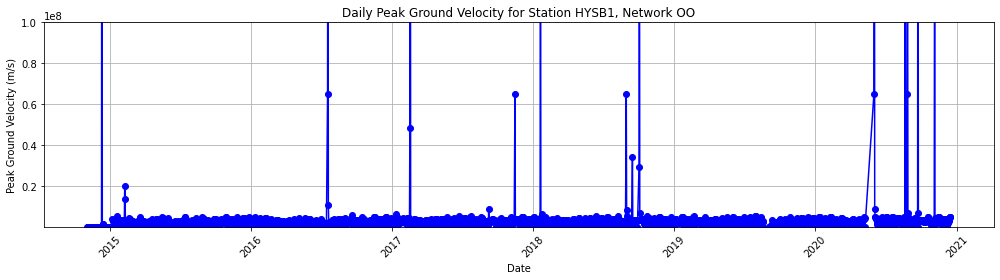

In [23]:
# Plotting the results
import matplotlib.pyplot as plt
dates, pgvs = zip(*pgv_results)

plt.figure(figsize=(14, 4))
plt.plot(dates, pgvs, marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Peak Ground Velocity (m/s)')
plt.title('Daily Peak Ground Velocity for Station HYSB1, Network OO')
plt.grid(True)
plt.ylim([100000, 100000000])
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("pgv_plot.png")
plt.show()